In [68]:
# Đọc thông tin về dữ liệu. Sử dụng bộ dữ liệu Cow_0203546.s001.xls

In [69]:
import numpy as np


In [70]:
#!pip install openpyxl

import pandas as pd
df = pd.read_excel(".//Cow_0203546.s001.xlsx")

In [71]:
# Hiển thị thông tin về bộ dữ liệu. 
#Có thể mở lại file Cow_0203546.s001.xlsx trên excel để đối chiếu:

df.head()

,Unnamed: 0,Feeding,Unnamed: 2,Unnamed: 3,Lying,Unnamed: 5,Unnamed: 6,Standing,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Standing up,Unnamed: 14,Unnamed: 15,Normal walking,Unnamed: 17,Unnamed: 18,Active walking,Unnamed: 20,Unnamed: 21
0,NaN,Acc in x (g),Acc in y (g),Acc in z (g),Acc in x (g),Acc in y (g),Acc in z (g),Acc in x (g),Acc in y (g),Acc in z (g),...,Acc in z (g),Acc in x (g),Acc in y (g),Acc in z (g),Acc in x (g),Acc in y (g),Acc in z (g),Acc in x (g),Acc in y (g),Acc in z (g)
1,1.0,-0.8,0.2,0.2,-0.1,0.3,-0.6,-0.8,0,0.4,...,1,-0.3,0.7,-1,-0.1,0.2,-0.1,-0.4,0.3,-1.2
2,NaN,-0.9,0.1,0.2,-0.1,0.3,-0.6,-0.8,0,0.4,...,-0.4,1.3,-1.6,-0.1,-0.3,-0.1,-0.5,-0.3,2.3,0.3
3,NaN,-0.9,0,0.3,-0.1,0.3,-0.6,-0.8,0,0.4,...,1.5,2.4,-2,0.7,0,-0.4,0.1,0.5,1.7,-0.3
4,NaN,-0.8,-0.1,0.4,-0.1,0.3,-0.6,-0.8,0,0.4,...,-0.4,-2.1,0.3,-0.6,-0.4,0,0.4,-1.3,1.3,2.5


In [72]:
# Để lấy các trường thông tin dùng hàm df.loc // location của pandas dataframe:
col_name = ['Feeding','Unnamed: 2', 'Unnamed: 3', 'Lying','Unnamed: 5', 'Unnamed: 6', 
            'Standing','Unnamed: 8', 'Unnamed: 9', 'Lying down','Unnamed: 11', 'Unnamed: 12',
            'Standing up','Unnamed: 14', 'Unnamed: 15', 'Normal walking','Unnamed: 17', 'Unnamed: 18', 
            'Active walking','Unnamed: 20', 'Unnamed: 21']
data = df.loc[:,col_name]

In [73]:
data_Feeding = data.iloc[1:,:3].dropna() # x-y-z và label là feeding 
data_Lying = data.iloc[1:,3:6].dropna()
data_Standing = data.iloc[1:,6:9].dropna()
data_Lyingdown = data.iloc[1:,9:12].dropna()
data_Standingup = data.iloc[1:,12:15].dropna()
data_Normalwalking = data.iloc[1:,15:18].dropna()
data_Activewalking = data.iloc[1:,18:21].dropna()

In [74]:
data_Feeding = data_Feeding.rename(columns={'Feeding': 'x', 'Unnamed: 2': 'y', 'Unnamed: 3': 'z'})
data_Feeding["label"] = 1
# data_Feeding = data_Feeding.drop(columns=['Feeding','Unnamed: 2', 'Unnamed: 3'])


data_Lying = data_Lying.rename(columns={'Lying': 'x', 'Unnamed: 5': 'y', 'Unnamed: 6': 'z'})
data_Lying["label"] = 2
# data_Feeding = data_Feeding.drop(columns=['Lying','Unnamed: 5', 'Unnamed: 6'])

data_Standing = data_Standing.rename(columns={'Standing': 'x', 'Unnamed: 8': 'y', 'Unnamed: 9': 'z'})
data_Standing["label"] = 3
# data_Feeding = data_Feeding.drop(columns=['Standing','Unnamed: 8', 'Unnamed: 9'])

data_Lyingdown = data_Lyingdown.rename(columns={'Lying down': 'x', 'Unnamed: 11': 'y', 'Unnamed: 12': 'z'})
data_Lyingdown["label"] = 4
# data_Feeding = data_Feeding.drop(columns=['Lying down','Unnamed: 11', 'Unnamed: 12'])

data_Standingup = data_Standingup.rename(columns={'Standing up': 'x', 'Unnamed: 14': 'y', 'Unnamed: 15': 'z'})
data_Standingup["label"] = 5
# data_Feeding = data_Feeding.drop(columns=['Standing up','Unnamed: 14', 'Unnamed: 15'])

data_Normalwalking = data_Normalwalking.rename(columns={'Normal walking': 'x', 'Unnamed: 17': 'y', 'Unnamed: 18': 'z'})
data_Normalwalking["label"] = 6
# data_Feeding = data_Feeding.drop(columns=['Normal walking','Unnamed: 17', 'Unnamed: 18'])

data_Activewalking = data_Activewalking.rename(columns={'Active walking': 'x', 'Unnamed: 20': 'y', 'Unnamed: 21': 'z'})
data_Activewalking["label"] = 7
# data_Feeding = data_Feeding.drop(columns=['Active walking','Unnamed: 20', 'Unnamed: 21'])


dataTotal = pd.concat([data_Feeding, data_Lying, data_Standing, data_Lyingdown, data_Standingup, data_Normalwalking, data_Activewalking])
train = dataTotal[["x","y","z"]]
label = dataTotal[["label"]]

print(train)

        x    y    z
1    -0.8  0.2  0.2
2    -0.9  0.1  0.2
3    -0.9    0  0.3
4    -0.8 -0.1  0.4
5    -1.1 -0.2  0.5
...   ...  ...  ...
3098  3.4 -2.3 -1.3
3099 -0.1  0.6  0.4
3100  0.1  0.4 -1.3
3101 -1.8  1.4 -0.4
3102  2.1 -0.2 -2.2

[22110 rows x 3 columns]


In [75]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_label, test_label = train_test_split(train, label, test_size=0.3, random_state=42)


In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
svm_model = SVC(kernel='sigmoid', C=2.0, random_state=42,
                    decision_function_shape="ovo")

start = time.time()
svm_model.fit(train_data, train_label)
y_pred = svm_model.predict(test_data)

end = time.time()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [77]:
print(y_pred)
from sklearn.metrics import accuracy_score

# Tính tỉ lệ chính xác
accuracy = accuracy_score(test_label, y_pred)

print("Tỉ lệ chính xác của mô hình SVM:", accuracy)


[7 1 2 ... 4 1 1]
Tỉ lệ chính xác của mô hình SVM: 0.44097693351424694


In [78]:
# Hiển thị thông tin của 1 đoạn dữ liệu bất kỳ:
data_Feeding[1:15]

,x,y,z,label
2,-0.9,0.1,0.2,1
3,-0.9,0,0.3,1
4,-0.8,-0.1,0.4,1
5,-1.1,-0.2,0.5,1
6,-0.8,0.1,0.3,1
7,-0.8,0.1,0.3,1
8,-0.8,0.1,0.3,1
9,-0.8,0.1,0.3,1
10,-0.8,0.1,0.3,1
11,-0.8,0.1,0.3,1


In [98]:
print(dataTotal)
print(dataTotal.shape[0])
print(dataTotal.columns)
print(np.array(dataTotal["label"]))


        x    y    z  label
1    -0.8  0.2  0.2      1
2    -0.9  0.1  0.2      1
3    -0.9    0  0.3      1
4    -0.8 -0.1  0.4      1
5    -1.1 -0.2  0.5      1
...   ...  ...  ...    ...
3098  3.4 -2.3 -1.3      7
3099 -0.1  0.6  0.4      7
3100  0.1  0.4 -1.3      7
3101 -1.8  1.4 -0.4      7
3102  2.1 -0.2 -2.2      7

[22110 rows x 4 columns]
22110
Index(['x', 'y', 'z', 'label'], dtype='object')
[1 1 1 ... 7 7 7]


In [99]:
def create_training_data(data, window_size, step_size):
    x_list = []
    y_list = []
    z_list = []
    train_labels = []
    
    for i in range(0, data.shape[0] - window_size, step_size):
        try:
            xs = data['x'].values[i: i + window_size]
            ys = data['y'].values[i: i + window_size]
            zs = data['z'].values[i: i + window_size]

            print(xs)

            label = np.array(data["label"])[i]

        

            x_list.append(xs)
            y_list.append(ys)
            z_list.append(zs)
            train_labels.append(label)
        except KeyError as e:
            print(f"KeyError: {e}")
    return x_list, y_list, z_list, train_labels

In [90]:
def calculate_accelerometer_features(x_list, y_list, z_list, window_size=20):
    X_train = pd.DataFrame()

    # mean
    X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
    X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
    X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

    # std dev
    X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
    X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
    X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

    # avg absolute diff
    X_train['x_aad'] = pd.Series(x_list).apply(
        lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['y_aad'] = pd.Series(y_list).apply(
        lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['z_aad'] = pd.Series(z_list).apply(
        lambda x: np.mean(np.absolute(x - np.mean(x))))

    # min
    X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
    X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
    X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

    # max
    X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
    X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
    X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

    # max-min diff
    X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
    X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
    X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

    # median
    X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
    X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
    X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

    # Mean Absolute Deviation" (Độ lệch tuyệt đối trung bình)
    X_train['x_mad'] = pd.Series(x_list).apply(
        lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['y_mad'] = pd.Series(y_list).apply(
        lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['z_mad'] = pd.Series(z_list).apply(
        lambda x: np.median(np.absolute(x - np.median(x))))

    # interquartile range Interquartile Range" (Phạm vi tứ phân vị) trong thống kê.
    X_train['x_IQR'] = pd.Series(x_list).apply(
        lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['y_IQR'] = pd.Series(y_list).apply(
        lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['z_IQR'] = pd.Series(z_list).apply(
        lambda x: np.percentile(x, 75) - np.percentile(x, 25))

    # negative count
    X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
    X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
    X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

    # positive count
    X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
    X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
    X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

    # values above mean
    X_train['x_above_mean'] = pd.Series(
        x_list).apply(lambda x: np.sum(x > x.mean()))
    X_train['y_above_mean'] = pd.Series(
        y_list).apply(lambda x: np.sum(x > x.mean()))
    X_train['z_above_mean'] = pd.Series(
        z_list).apply(lambda x: np.sum(x > x.mean()))

 


    # energy
    X_train['x_energy'] = pd.Series(x_list).apply(
        lambda x: np.sum(x**2)/window_size)
    X_train['y_energy'] = pd.Series(y_list).apply(
        lambda x: np.sum(x**2)/window_size)
    X_train['z_energy'] = pd.Series(z_list).apply(
        lambda x: np.sum(x**2/window_size))

    # avg resultant
    X_train['avg_result_accl'] = [i.mean() for i in (
        (pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

    # signal magnitude area
    X_train['sma'] = pd.Series(x_list).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list).apply(
        lambda x: np.sum(abs(x)/window_size)) + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/window_size))
    return X_train


In [100]:
x_list, y_list, z_list, train_labels = create_training_data(
    data=dataTotal, window_size=20, step_size=10)

[-0.8 -0.9 -0.9 -0.8 -1.1 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8 -0.8 -0.9 -0.9 -0.9]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.9 -0.9 -0.9 -0.8 -0.9 -0.9 -0.9
 -0.9 -0.8 -0.8 -0.8 -0.8 -0.8]
[-0.8 -0.9 -0.9 -0.9 -0.9 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9]
[-0.8 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9]
[-0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.8 -0.9
 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9]
[-0.9 -0.9 -0.8 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.8 -0.8 -0.8 -0.8
 -

In [101]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)

In [102]:
print("features", len(features))
print(len(train_labels))
print(train_labels[0])


features 2209
2209
1


In [103]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, train_labels, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"Train features size: {len(features_train)}")
print(f"Test features size: {len(features_test)}")
print(f"Train labels size: {len(labels_train)}")
print(f"Test labels size: {len(labels_test)}")

print(f"Shape of features_train: {np.array(features_train).shape}")
print(f"Shape of labels_train:", labels_test)

Train features size: 1767
Test features size: 442
Train labels size: 1767
Test labels size: 442
Shape of features_train: (1767, 41)
Shape of labels_train: [3, 6, 6, 2, 6, 5, 3, 2, 4, 7, 5, 2, 4, 6, 2, 2, 4, 2, 1, 7, 2, 1, 7, 6, 1, 2, 6, 7, 7, 1, 3, 1, 6, 3, 6, 6, 3, 2, 7, 1, 7, 7, 7, 1, 6, 3, 3, 6, 6, 5, 3, 2, 7, 6, 6, 3, 6, 5, 4, 6, 5, 6, 6, 1, 1, 1, 1, 5, 7, 6, 4, 1, 4, 2, 5, 6, 7, 1, 1, 7, 5, 3, 3, 1, 1, 1, 5, 1, 3, 2, 6, 2, 6, 6, 1, 6, 1, 4, 6, 7, 6, 1, 2, 1, 2, 2, 2, 6, 5, 6, 1, 7, 2, 2, 1, 5, 3, 3, 1, 7, 7, 1, 2, 2, 5, 4, 1, 6, 4, 3, 3, 3, 5, 6, 1, 7, 6, 6, 7, 2, 7, 1, 5, 2, 4, 7, 1, 2, 7, 2, 1, 1, 7, 4, 6, 3, 7, 2, 4, 1, 3, 2, 3, 2, 7, 1, 2, 6, 6, 2, 4, 2, 6, 6, 1, 3, 6, 6, 6, 5, 2, 7, 2, 3, 3, 6, 1, 7, 5, 7, 3, 7, 1, 5, 6, 2, 2, 1, 3, 2, 2, 3, 5, 6, 2, 1, 6, 1, 2, 3, 2, 1, 7, 1, 6, 6, 1, 2, 6, 6, 5, 1, 2, 6, 2, 6, 7, 3, 1, 4, 5, 1, 4, 3, 4, 4, 7, 3, 3, 1, 1, 5, 5, 5, 1, 4, 3, 2, 5, 4, 6, 2, 4, 2, 1, 2, 6, 4, 1, 1, 6, 6, 4, 2, 3, 1, 1, 2, 6, 3, 2, 7, 7, 6, 4, 1, 6, 1, 1, 6, 1, 2

In [104]:
from sklearn.ensemble import RandomForestClassifier

   # Tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

   # Huấn luyện mô hình trên tập train
rf_model.fit(features_train, labels_train)

RandomForestClassifier(random_state=42)

In [105]:
from sklearn.metrics import accuracy_score, classification_report

   # Dự đoán nhãn cho tập test
labels_pred = rf_model.predict(features_test)

   # Đánh giá độ chính xác
accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {accuracy:.2f}")

   # In báo cáo phân loại chi tiết
print("Classification Report:")
print(classification_report(labels_test, labels_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.76      0.78        85
           2       0.99      0.99      0.99        82
           3       0.65      0.66      0.65        50
           4       0.65      0.67      0.66        39
           5       0.59      0.56      0.58        34
           6       0.97      1.00      0.98        93
           7       1.00      1.00      1.00        59

    accuracy                           0.85       442
   macro avg       0.81      0.81      0.81       442
weighted avg       0.85      0.85      0.85       442



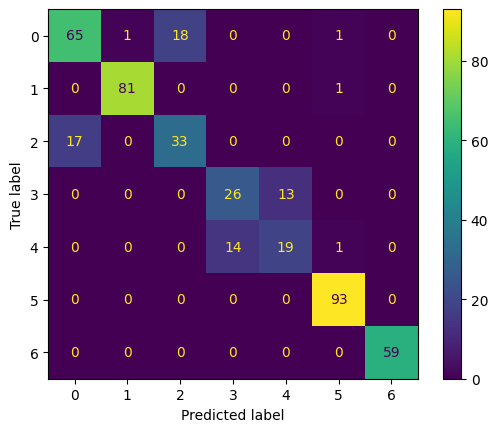

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Giả sử bạn đã có labels_test và labels_pred từ mô hình của mình
labels_pred = rf_model.predict(features_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(labels_test, labels_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

